Jessica Yoon
<br>Phase4 Project

# X-Ray Diagnostics: Pediatric Pneumonia

This notebook will develop a model to classify pediatric chest x-rays with convolutional neural networks.

# Importing Downloaded [Data](https://data.mendeley.com/datasets/rscbjbr9sj/3)

Importing Necessary Python Libraries

In [1]:
import os, shutil

1. Splitting Original Directories into Train/Test/Validation Directories
2. Loading Directory Paths & Contents into Variables

In [2]:
# Loading Directory Paths into Variables
original_normal = 'ORIGINAL_DATA/NORMAL'
original_pneumonia = 'ORIGINAL_DATA/PNEUMONIA'

new_dir = 'data/'

train_folder = os.path.join(new_dir, 'train')
train_normal = os.path.join(train_folder, 'normal')
train_pneumonia = os.path.join(train_folder, 'pneumonia')

test_folder = os.path.join(new_dir, 'test')
test_normal = os.path.join(test_folder, 'normal')
test_pneumonia = os.path.join(test_folder, 'pneumonia')

val_folder = os.path.join(new_dir, 'validation')
val_normal = os.path.join(val_folder, 'normal')
val_pneumonia = os.path.join(val_folder, 'pneumonia')

# Creating Split Directories
os.mkdir(new_dir)

os.mkdir(test_folder)
os.mkdir(test_normal)
os.mkdir(test_pneumonia)

os.mkdir(train_folder)
os.mkdir(train_normal)
os.mkdir(train_pneumonia)

os.mkdir(val_folder)
os.mkdir(val_normal)
os.mkdir(val_pneumonia)

In [3]:
# Exploring Raw Source Data

# Number of Images in NORMAL Directory
imgs_normal = [file for file in os.listdir(
    original_normal) if file.endswith('.jpeg')]
print(len(imgs_normal), 'images in NORMAL directory')

# NUmber of Images in PNEUMONIA Directory
imgs_pneumonia = [file for file in os.listdir(
    original_pneumonia) if file.endswith('.jpeg')]
print(len(imgs_pneumonia), 'images in PNEUMONIA directory')

1583 images in NORMAL directory
4273 images in PNEUMONIA directory


In [4]:
# Copying Raw Data into Split Directories

# train normal
imgs = imgs_normal[:1200]
for img in imgs:
    origin = os.path.join(original_normal, img)
    destination = os.path.join(train_normal, img)
    shutil.copyfile(origin, destination)

# test normal
imgs = imgs_normal[1200:1383]
for img in imgs:
    origin = os.path.join(original_normal, img)
    destination = os.path.join(test_normal, img)
    shutil.copyfile(origin, destination)

# validation normal
imgs = imgs_normal[1383:]
for img in imgs:
    origin = os.path.join(original_normal, img)
    destination = os.path.join(val_normal, img)
    shutil.copyfile(origin, destination)

# train pneumonia
imgs = imgs_pneumonia[:3900]
for img in imgs:
    origin = os.path.join(original_pneumonia, img)
    destination = os.path.join(train_pneumonia, img)
    shutil.copyfile(origin, destination)

# test pneumonia
imgs = imgs_pneumonia[3900:4073]
for img in imgs:
    origin = os.path.join(original_pneumonia, img)
    destination = os.path.join(test_pneumonia, img)
    shutil.copyfile(origin, destination)

# validation pneumonia
imgs = imgs_pneumonia[4073:]
for img in imgs:
    origin = os.path.join(original_pneumonia, img)
    destination = os.path.join(val_pneumonia, img)
    shutil.copyfile(origin, destination)

In [5]:
## CELL INTENDED TO RE-ESTABLISH VARIABLES ##
## FROM DEAD/RESTARTED KERNELS ##

# Loading Directory Paths into Variables
train_folder = 'data/train'
train_normal = 'data/train/normal'
train_pneumonia = 'data/train/pneumonia'

test_folder = 'data/test'
test_normal = 'data/test/normal'
test_pneumonia = 'data/test/pneumonia'

val_folder = 'data/validation'
val_normal = 'data/validation/normal'
val_pneumonia = 'data/validation/pneumonia'

Verifying Data in Split Directories

In [6]:
# Number of Images in Each Directory

a1 = len(os.listdir(train_normal))
a2 = len(os.listdir(train_pneumonia))
a = a1 + a2
b1 = len(os.listdir(test_normal))
b2 = len(os.listdir(test_pneumonia))
b = b1 + b2
c1 = len(os.listdir(val_normal))
c2 = len(os.listdir(val_pneumonia))
c = c1 + c2

print(a, 'images in train directory')
print(b, 'images in test directory')
print(c, 'images in validation directory')

5100 images in train directory
356 images in test directory
400 images in validation directory


# Preprocessing Data

Importing Necessary Python Libraries

In [7]:
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import (
    ImageDataGenerator, array_to_img, 
    img_to_array, load_img)

np.random.seed(123)

Preprocess Part A

In [8]:
# flow_from_directory Variables
targetimagesize_ = (150, 150)
trainbatchsize_ = a
testbatchsize_ = b
valbatchsize_ = c

# Reshape Data in train Directory
train_generator = ImageDataGenerator(
    rescale=1./255).flow_from_directory(
    train_folder, 
    target_size = targetimagesize_,
    batch_size = trainbatchsize_)

# Reshape Data in test Directory
test_generator = ImageDataGenerator(
    rescale=1./255).flow_from_directory(
    test_folder, 
    target_size = targetimagesize_,
    batch_size = testbatchsize_)

# Reshape Data in validation Directory
val_generator = ImageDataGenerator(
    rescale=1./255).flow_from_directory(
    val_folder, 
    target_size = targetimagesize_,
    batch_size = valbatchsize_)

Found 5100 images belonging to 2 classes.
Found 356 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [9]:
# Load Dataset into Variables
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [10]:
# Exploring Final Datasets
m_train = train_images.shape[0]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 5100
Number of testing samples: 356
Number of validation samples: 400
train_images shape: (5100, 150, 150, 3)
train_labels shape: (5100, 2)
test_images shape: (356, 150, 150, 3)
test_labels shape: (356, 2)
val_images shape: (400, 150, 150, 3)
val_labels shape: (400, 2)


Preprocess Part B

In [11]:
# Reshaping into 2-D Array

train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5100, 67500)
(356, 67500)
(400, 67500)


In [12]:
# Loading y Variables as 2-D Array

train_y = np.reshape(train_labels[:,0], (trainbatchsize_,1))
test_y = np.reshape(test_labels[:,0], (testbatchsize_,1))
val_y = np.reshape(val_labels[:,0], (valbatchsize_,1))

input_shape_ = train_img.shape[1]

# Modeling

Importing Necessary Python Libraries

In [13]:
# Importing Python Libraries to Fit Models
from keras.models import Sequential
from keras.layers import (
    Conv2D, Dense, Flatten, MaxPooling2D)
from keras import optimizers

# Importing Python Libraries for Analysis
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, roc_curve, auc,
    confusion_matrix)

%matplotlib inline
np.random.seed(123)

### Baseline Model

In [14]:
# Building the Model

def Build_Baseline():
    model = Sequential()
    model.add(Dense(20, activation='relu',
                           input_shape=(input_shape_,)))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(optimizer='sgd',
                  loss='binary_crossentropy',
                  metrics=['acc'])
    return model

In [15]:
# Timer Start
start = datetime.datetime.now()

In [16]:
base = Build_Baseline()
basehist = base.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Epoch 1/50
160/160 [==============================] - 2s 11ms/step - loss: 0.4558 - acc: 0.7996 - val_loss: 0.5014 - val_acc: 0.7825
Epoch 2/50
160/160 [==============================] - 1s 9ms/step - loss: 0.3256 - acc: 0.8669 - val_loss: 1.3702 - val_acc: 0.5200
Epoch 3/50
160/160 [==============================] - 1s 8ms/step - loss: 0.2586 - acc: 0.8941 - val_loss: 0.2888 - val_acc: 0.8700
Epoch 4/50
160/160 [==============================] - 1s 8ms/step - loss: 0.2307 - acc: 0.9039 - val_loss: 0.8482 - val_acc: 0.6125
Epoch 5/50
160/160 [==============================] - 1s 8ms/step - loss: 0.1877 - acc: 0.9286 - val_loss: 0.4494 - val_acc: 0.8100
Epoch 6/50
160/160 [==============================] - 1s 8ms/step - loss: 0.1951 - acc: 0.9224 - val_loss: 0.5184 - val_acc: 0.7875
Epoch 7/50
160/160 [==============================] - 1s 8ms/step - loss: 0.1822 - acc: 0.9273 - val_loss: 0.5070 - val_acc: 0.8000
Epoch 8/50
160/160 [==============================] - 1s 8ms/step - loss: 0

In [17]:
# Timer End
end = datetime.datetime.now()
elapsed = end - start
print('Training Elapsed Time: {}'.format(elapsed))

Training Elapsed Time: 0:01:09.876972


### Baseline Model Analysis

In [124]:
# Loading Variables for Analysis

results_train = base.evaluate(train_img, train_y)
results_test = base.evaluate(test_img, test_y)

pred_y = base.predict(test_img).ravel()

fpr_, tpr_, thresholds_ = roc_curve(test_y, pred_y)
auc_ = auc(fpr_, tpr_)

12/12 [==============================] - 0s 2ms/step - loss: 0.2521 - acc: 0.9045


In [125]:
# Evaluation Results
print ('Train Results:', results_train)
print ('Test Results:', results_test)

Train Results: [0.11654186993837357, 0.9537255167961121]
Test Results: [0.25213193893432617, 0.9044944047927856]


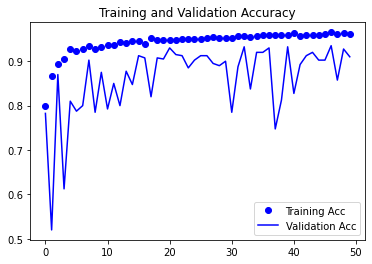

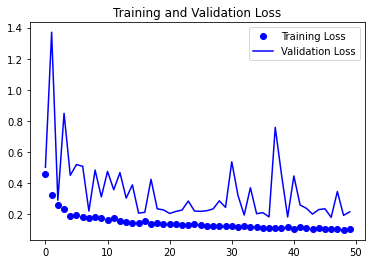

In [126]:
acc = basehist.history['acc']
val_acc = basehist.history['val_acc']
loss = basehist.history['loss']
val_loss = basehist.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [127]:
pred_y = (base.predict(test_img).ravel() > 0.5).astype(int)

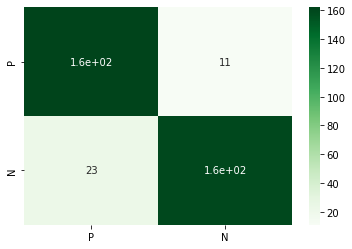

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       173
         1.0       0.94      0.87      0.90       183

    accuracy                           0.90       356
   macro avg       0.91      0.91      0.90       356
weighted avg       0.91      0.90      0.90       356



In [128]:
# Confusion Matrix
cm = confusion_matrix(test_y, pred_y)
f = sns.heatmap(cm, annot=True, cmap='Greens', 
                xticklabels='PN', yticklabels='PN')
plt.show()

# Classification Report
print(classification_report(test_y, pred_y))

In [129]:
print('False Normal Rate:', (11/b2)*100)

False Normal Rate: 6.358381502890173


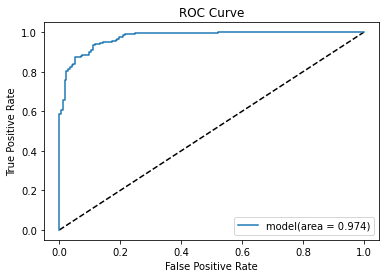

In [130]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_, tpr_,
         label='model(area = {:.3f})'.format(auc_))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [131]:
auc_

0.9736567800625414

In [134]:
pred_y = (base.predict(test_img).ravel() > 0.95).astype(int)

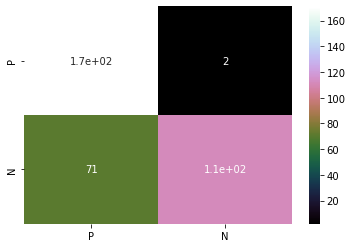

              precision    recall  f1-score   support

         0.0       0.71      0.99      0.82       173
         1.0       0.98      0.61      0.75       183

    accuracy                           0.79       356
   macro avg       0.84      0.80      0.79       356
weighted avg       0.85      0.79      0.79       356



In [135]:
# Confusion Matrix
cm = confusion_matrix(test_y, pred_y)
f = sns.heatmap(cm, annot=True, cmap='cubehelix', 
                xticklabels='PN', yticklabels='PN')
plt.show()

# Classification Report
print(classification_report(test_y, pred_y))

In [136]:
print('False Normal Rate:', (2/b2)*100)

False Normal Rate: 1.1560693641618496


In [59]:
base.save('XRAY_Baseline_Model.h5')

### CNN Model

In [26]:
# Building the Model

def Build_CNN():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu',
                     input_shape=(150 ,150,  3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (4, 4), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(optimizer='sgd',
                  loss='binary_crossentropy',
                  metrics=['acc'])
    return model

In [27]:
# Timer Start
start = datetime.datetime.now()

In [29]:
cnn = Build_CNN()
history = cnn.fit(train_images,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Epoch 1/50
160/160 [==============================] - 73s 458ms/step - loss: 0.5162 - acc: 0.7727 - val_loss: 0.5916 - val_acc: 0.6425
Epoch 2/50
160/160 [==============================] - 74s 460ms/step - loss: 0.3747 - acc: 0.8406 - val_loss: 0.3607 - val_acc: 0.8500
Epoch 3/50
160/160 [==============================] - 74s 461ms/step - loss: 0.2678 - acc: 0.8957 - val_loss: 0.3012 - val_acc: 0.8650
Epoch 4/50
160/160 [==============================] - 74s 463ms/step - loss: 0.2082 - acc: 0.9196 - val_loss: 0.2674 - val_acc: 0.8825
Epoch 5/50
160/160 [==============================] - 74s 461ms/step - loss: 0.1899 - acc: 0.9259 - val_loss: 0.7132 - val_acc: 0.6750
Epoch 6/50
160/160 [==============================] - 75s 470ms/step - loss: 0.1676 - acc: 0.9357 - val_loss: 0.2129 - val_acc: 0.9150
Epoch 7/50
160/160 [==============================] - 74s 460ms/step - loss: 0.1559 - acc: 0.9443 - val_loss: 0.1949 - val_acc: 0.9175
Epoch 8/50
160/160 [==============================] - 7

In [30]:
# Timer End
end = datetime.datetime.now()
elapsed = end - start
print('Training Elapsed Time: {}'.format(elapsed))

Training Elapsed Time: 1:26:36.105971


### CNN Model Analysis

In [137]:
# Loading Variables for Analysis

results_train = cnn.evaluate(train_images, train_y)
results_test = cnn.evaluate(test_images, test_y)

pred_y = cnn.predict(test_images).ravel()

fpr_, tpr_, thresholds_ = roc_curve(test_y, pred_y)
auc_ = auc(fpr_, tpr_)

12/12 [==============================] - 1s 54ms/step - loss: 0.1540 - acc: 0.9466


In [138]:
# Results
print ('Train Results:', results_train)
print ('Test Results:', results_test)

Train Results: [0.019027573987841606, 0.9950980544090271]
Test Results: [0.1540239155292511, 0.9466292262077332]


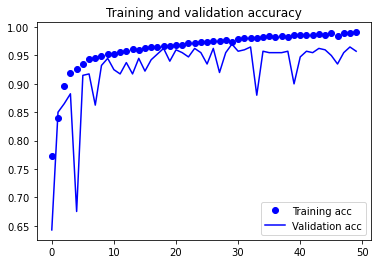

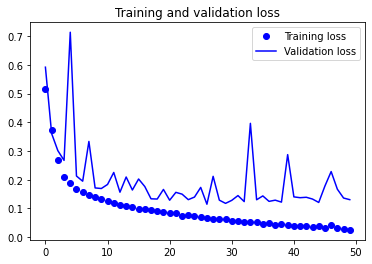

In [139]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [140]:
pred_y = (cnn.predict(test_images).ravel() > 0.5).astype(int)

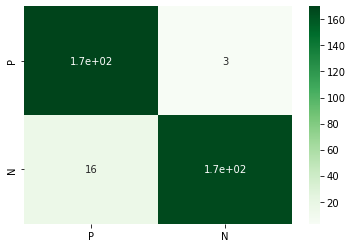

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95       173
         1.0       0.98      0.91      0.95       183

    accuracy                           0.95       356
   macro avg       0.95      0.95      0.95       356
weighted avg       0.95      0.95      0.95       356



In [141]:
# Confusion Matrix
cm = confusion_matrix(test_y, pred_y)
f = sns.heatmap(cm, annot=True, cmap='Greens', 
                xticklabels='PN', yticklabels='PN')
plt.show()

# Classification Report
print(classification_report(test_y, pred_y))

In [142]:
print('False Normal Rate:', (3/b2)*100)

False Normal Rate: 1.7341040462427744


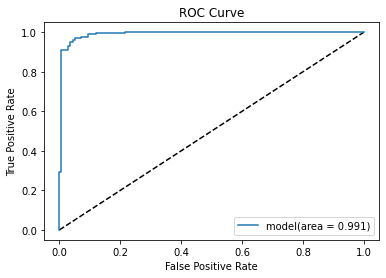

In [143]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_, tpr_,
         label='model(area = {:.3f})'.format(auc_))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [144]:
auc_

0.9909030607410215

In [145]:
pred_y = (cnn.predict(test_images).ravel() > auc_).astype(int)

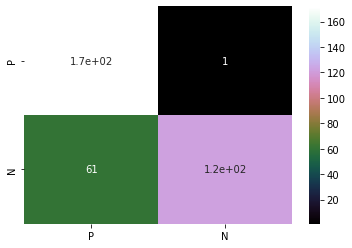

              precision    recall  f1-score   support

         0.0       0.74      0.99      0.85       173
         1.0       0.99      0.67      0.80       183

    accuracy                           0.83       356
   macro avg       0.87      0.83      0.82       356
weighted avg       0.87      0.83      0.82       356



In [146]:
# Confusion Matrix
cm = confusion_matrix(test_y, pred_y)
f = sns.heatmap(cm, annot=True, cmap='cubehelix', 
                xticklabels='PN', yticklabels='PN')
plt.show()

# Classification Report
print(classification_report(test_y, pred_y))

In [147]:
print('False Normal Rate:', (1/b2)*100)

False Normal Rate: 0.5780346820809248


In [58]:
cnn.save('XRAY_CNN_Model.h5')

### Image Classification Process (CNN)

Importing Necessary Libraries

In [60]:
from keras.models import load_model
from keras.preprocessing import image
from keras import models
import math 
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

Open/Load a Model

In [148]:
model = load_model('XRAY_CNN_Model.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 71, 71, 32)        16416     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 33, 33, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)            

Open/Load Sample Test Image

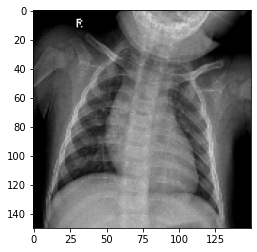

In [149]:
filename = 'data/test/normal/NORMAL-7725506-0001.jpeg'
img = image.load_img(filename, target_size=(150, 150))
plt.imshow(img)
plt.show()

View Image as Tensor

(1, 150, 150, 3)


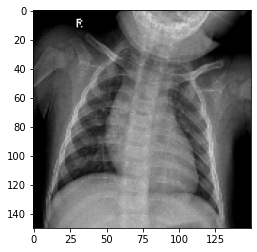

In [150]:
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

# Follow the Original Model Preprocessing
img_tensor /= 255.

# Check tensor shape
print(img_tensor.shape)

# Preview an image
plt.imshow(img_tensor[0])
plt.show()

Visualization of Activation Layers

<ipython-input-151-2441043dfcd8>:40: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


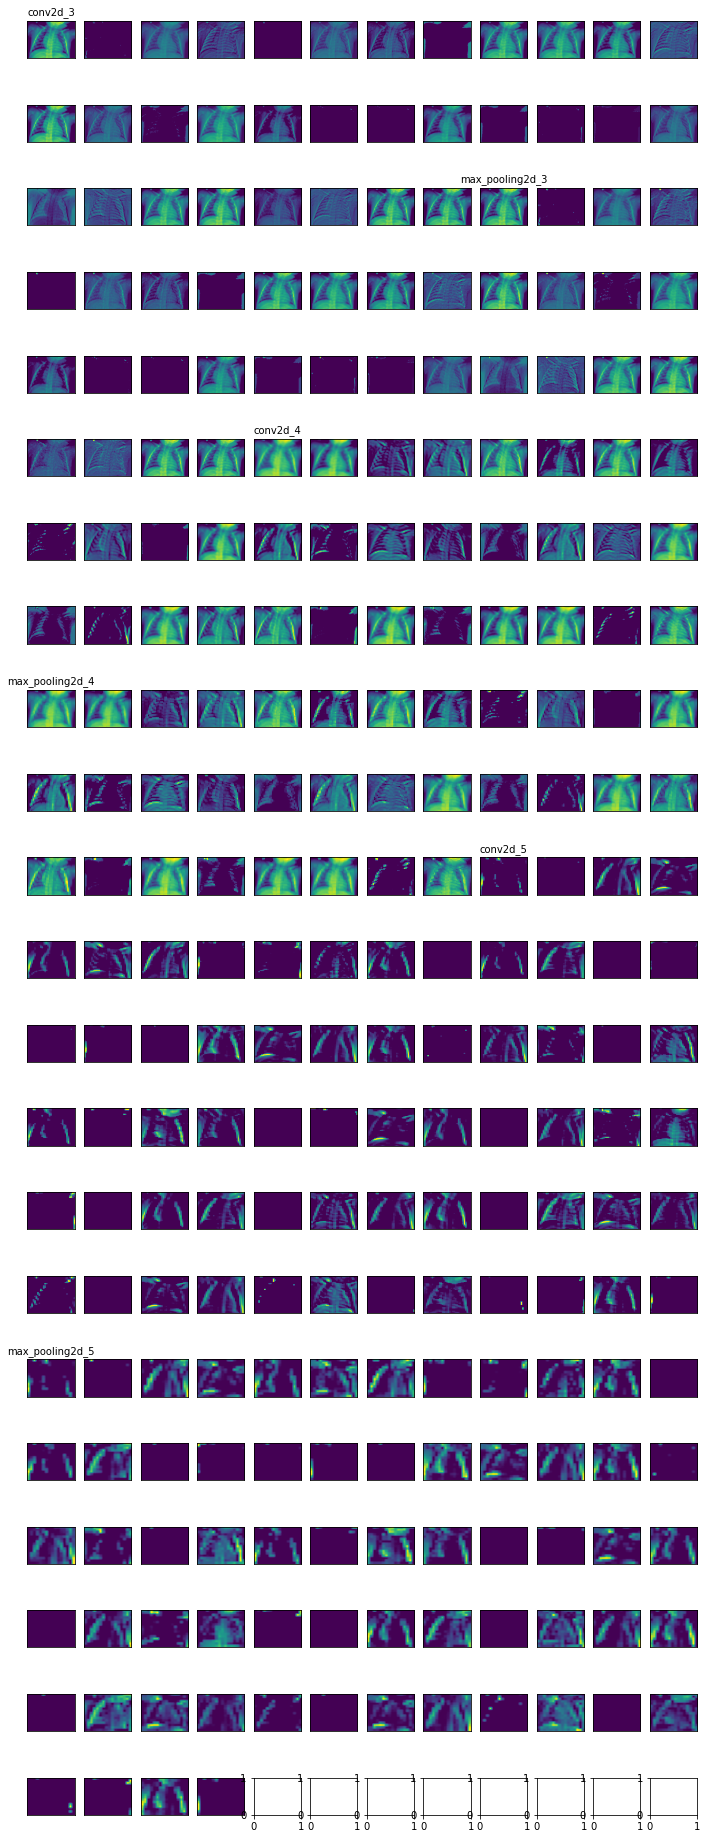

In [151]:
# Extract model layer outputs
layer_outputs = [
    layer.output for layer in model.layers[:6]]

# Create a model for displaying the feature maps
activation_model = models.Model(
    inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

# Extract Layer Names for Labelling
layer_names = []
for layer in model.layers[:6]:
    layer_names.append(layer.name)

total_features = sum([a.shape[-1] for a in activations])
total_features

n_cols = 12
n_rows = math.ceil(total_features / n_cols)


iteration = 0
fig , axes = plt.subplots(nrows=n_rows, ncols=n_cols, 
                          figsize=(n_cols, n_rows*1.5))

for layer_n, layer_activation in enumerate(activations):
    n_channels = layer_activation.shape[-1]
    for ch_idx in range(n_channels):
        row = iteration // n_cols
        column = iteration % n_cols
    
        ax = axes[row, column]

        channel_image = layer_activation[0,
                                         :, :,
                                         ch_idx]

        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 32
        channel_image += 64
        channel_image = np.clip(
            channel_image, 0, 255).astype('uint8')

        ax.imshow(channel_image, aspect='auto', 
                  cmap='viridis')
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        
        if ch_idx == 0:
            ax.set_title(layer_names[layer_n], fontsize=10)
        iteration += 1

fig.subplots_adjust(hspace=1.25)
plt.savefig('Intermediate_Activations_Visualized.pdf')
plt.show()